In [9]:
import tweepy
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from ipython_secrets import *

Tokens generated on Twitter for Developers, to scrapp data with specified features and save them as dictionary. 

In [ ]:
consumer_key = get_secret('consumer_key')
consumer_secret = get_secret('consumer_secret')
access_token = get_secret('access_token')
access_token_secret = get_secret('access_token_secret')

In [11]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True)

In [7]:
tweets = {'date': [], 'text': []}

In [8]:
for tweet in tweepy.Cursor(api.search,q="#ArtificialIntelligence amazing",count=10,
                           lang="en",
                           since="2019-04-03", tweet_mode='extended').items():
    tweets['date'].append(tweet.created_at)
    tweets['text'].append(tweet.full_text)

To obtain .csv file save obtained dict to DataFrame and save to .csv.

In [9]:
df = pd.DataFrame.from_dict(tweets)
df.head()

,date,text
0,2019-05-17 11:35:02,The Amazing Ways The Ford Motor Company Uses A...
1,2019-05-17 11:32:11,The Amazing Ways The Ford Motor Company Uses #...
2,2019-05-17 11:30:04,RT @schmarzo: The Amazing Ways The Ford Motor ...
3,2019-05-17 11:29:23,The Amazing Ways The Ford Motor Company Uses #...
4,2019-05-17 11:26:56,The Amazing Ways The Ford Motor Company Uses #...


In [10]:
df.to_csv('Tweets_unproc.csv', index=False)

In [12]:
unproc_tweets = pd.read_csv('/home/pacis/Desktop/sentimentAnalysis/Tweets_unproc.csv')

In [13]:
unproc_tweets.shape

(296, 2)

In [14]:
unproc_tweets.dropna()
unproc_tweets.shape

(296, 2)

In [15]:
tweets_text = list(unproc_tweets['text'])
tweets_text[:5]

['The Amazing Ways The Ford Motor Company Uses Artificial Intelligence And Machine Learning #MachineLearning #ArtificialIntelligence  https://t.co/E3kPf4Tlwb',
 'The Amazing Ways The Ford Motor Company Uses #ArtificialIntelligence And #MachineLearning\n#AI #ML #Ford @FordMotors2002 #SmartTech #cars #AutomousVechicle #technews #technologynews \nhttps://t.co/xLezVDizA6',
 'RT @schmarzo: The Amazing Ways The Ford Motor Company Uses #ArtificialIntelligence And #MachineLearning  https://t.co/ARPZLb3o5r',
 'The Amazing Ways The Ford Motor Company Uses #ArtificialIntelligence And #MachineLearning  https://t.co/ARPZLb3o5r',
 'The Amazing Ways The Ford Motor Company Uses #ArtificialIntelligence And #MachineLearning https://t.co/wlLgLG3cCa']

Tweets preprocessing to obtain data without accounts' names and links by use of regular expressions (they would change sentiment score).

In [16]:
cleaned_tweets = [re.sub(r'(https://[^\s]+)', '', file) for file in tweets_text]
cleaned_tweets = [re.sub(r'(@(\w){1,50})', '', file) for file in cleaned_tweets]

In [17]:
cleaned_tweets[:2]

['The Amazing Ways The Ford Motor Company Uses Artificial Intelligence And Machine Learning #MachineLearning #ArtificialIntelligence  ',
 'The Amazing Ways The Ford Motor Company Uses #ArtificialIntelligence And #MachineLearning\n#AI #ML #Ford  #SmartTech #cars #AutomousVechicle #technews #technologynews \n']

SEED = 42, beacuse it is the Answer to the Ultimate Question of Life, the Universe, and Everything.

In [18]:
import random
from textblob import TextBlob

SEED=42
random.seed(SEED)

In [19]:
sample = random.sample(cleaned_tweets, 150)

In [20]:
sentiments =[]

for element in sample:
    tb = TextBlob(element)
    sentiments.append(tb.sentiment.polarity)

In [21]:
unproc_tweets['sentiment'] = pd.Series(sentiments) 

In [22]:
unproc_tweets[:4]

,date,text,sentiment
0,2019-05-17 11:35:02,The Amazing Ways The Ford Motor Company Uses A...,0.366667
1,2019-05-17 11:32:11,The Amazing Ways The Ford Motor Company Uses #...,0.600000
2,2019-05-17 11:30:04,RT @schmarzo: The Amazing Ways The Ford Motor ...,0.600000
3,2019-05-17 11:29:23,The Amazing Ways The Ford Motor Company Uses #...,0.575000


In [23]:
unproc_tweets.shape

(296, 3)

In [24]:
tweets = unproc_tweets[unproc_tweets['sentiment'] != 0.0]

In [25]:
tweets.dropna(inplace = True)

/home/pacis/.local/share/virtualenvs/sentimentAnalysis-OVWMreQV/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [26]:
shape = tweets.shape

Simple analysis of sentiment score.

In [27]:
a=tweets[tweets['sentiment'] > 0].shape
above = a[0]/shape[0]*100
'Percentage of positive scores:', round(above, 4) 

('Percentage of positive scores:', 98.5185)

In [28]:
b=tweets[tweets['sentiment'] < 0].shape
below = b[0]/shape[0]*100
'Percentage of negatives scores:', round(below, 4) 

('Percentage of negatives scores:', 1.4815)

In [29]:
tweets.groupby(pd.cut(tweets['sentiment'], np.arange(-1, 1+0.2, 0.2))).count()

,date,text,sentiment
sentiment,,,
"(-1.0, -0.8]",0,0,0
"(-0.8, -0.6]",0,0,0
"(-0.6, -0.4]",0,0,0
"(-0.4, -0.2]",1,1,1
"(-0.2, -2.22e-16]",1,1,1
"(-2.22e-16, 0.2]",28,28,28
"(0.2, 0.4]",21,21,21
"(0.4, 0.6]",30,30,30
"(0.6, 0.8]",52,52,52


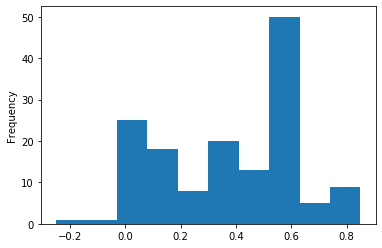

In [30]:
_ = unproc_tweets['sentiment'].plot(kind='hist')